In [12]:
!pip install pandas seaborn matplotlib scikit-learn gensim eli5 tiktoken spacy gensim wordcloud datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:0000:0100:010m


In [13]:
from datasets import load_dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, r2_score
from sklearn.linear_model import LogisticRegression

***Récuperation et découpage du dataset***
https://huggingface.co/datasets/yaful/DeepfakeTextDetect

In [14]:
dataset = load_dataset("yaful/DeepfakeTextDetect")
df = dataset["train"].to_pandas()
df

Generating train split:   0%|          | 0/319071 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/56792 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/56819 [00:00<?, ? examples/s]

Generating test_ood_gpt split:   0%|          | 0/1562 [00:00<?, ? examples/s]

Generating test_ood_gpt_para split:   0%|          | 0/2362 [00:00<?, ? examples/s]

,text,label,src
0,White girls very rarely date Asian men. Even i...,1,cmv_human
1,I am a 23 year old male Indian American male. ...,1,cmv_human
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human
3,(A) Work part-time in high school; Then go to ...,1,cmv_human
4,When police introduce a new form of speed prev...,1,cmv_human
...,...,...,...
319066,Noisy Intermediate-Scale Quantum (NISQ) machin...,1,sci_gen_human
319067,Recent years have seen rising needs for locati...,1,sci_gen_human
319068,The ongoing neural revolution in machine trans...,1,sci_gen_human
319069,Let D be a set of n pairwise disjoint unit dis...,1,sci_gen_human


In [15]:
# Fonctions de tokenisation
def byte_pair_tokenize(doc):
    enc = tiktoken.encoding_for_model("gpt-4")
    tokens = enc.encode(doc)
    return [str(token) for token in tokens]

def lemma_tokenize(doc):
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(t) for t in word_tokenize(doc)]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=69)

# Création du modèle de Machine Learning
#model = make_pipeline(CountVectorizer(tokenizer=byte_pair_tokenize, lowercase=True, ngram_range=(3, 3)), LogisticRegression(random_state=69, solver="liblinear",penalty = 'l2'))

In [17]:
classifiers = {}
for i in range(1,6):
    classifiers.update({f"{i}-gram": make_pipeline(CountVectorizer(tokenizer=byte_pair_tokenize, lowercase=True, ngram_range = (i,i)), LogisticRegression(random_state=69, solver="liblinear",penalty = 'l2'))})
classifiers

{'1-gram': Pipeline(steps=[('countvectorizer',
                  CountVectorizer(tokenizer=<function byte_pair_tokenize at 0x79fc2f6103a0>)),
                 ('logisticregression',
                  LogisticRegression(random_state=69, solver='liblinear'))]),
 '2-gram': Pipeline(steps=[('countvectorizer',
                  CountVectorizer(ngram_range=(2, 2),
                                  tokenizer=<function byte_pair_tokenize at 0x79fc2f6103a0>)),
                 ('logisticregression',
                  LogisticRegression(random_state=69, solver='liblinear'))]),
 '3-gram': Pipeline(steps=[('countvectorizer',
                  CountVectorizer(ngram_range=(3, 3),
                                  tokenizer=<function byte_pair_tokenize at 0x79fc2f6103a0>)),
                 ('logisticregression',
                  LogisticRegression(random_state=69, solver='liblinear'))]),
 '4-gram': Pipeline(steps=[('countvectorizer',
                  CountVectorizer(ngram_range=(4, 4),
           

Model: 1-gram


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Features dimension: (255256, 42543)
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     45082
           1       0.82      0.58      0.68     18733

    accuracy                           0.84     63815
   macro avg       0.83      0.76      0.79     63815
weighted avg       0.84      0.84      0.83     63815

Model: 2-gram


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Features dimension: (255256, 5774901)
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     45082
           1       0.93      0.83      0.87     18733

    accuracy                           0.93     63815
   macro avg       0.93      0.90      0.91     63815
weighted avg       0.93      0.93      0.93     63815

Model: 3-gram


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Features dimension: (255256, 23333890)
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     45082
           1       0.93      0.84      0.89     18733

    accuracy                           0.94     63815
   macro avg       0.94      0.91      0.92     63815
weighted avg       0.94      0.94      0.93     63815

Model: 4-gram


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Features dimension: (255256, 40473710)
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     45082
           1       0.92      0.85      0.89     18733

    accuracy                           0.94     63815
   macro avg       0.93      0.91      0.92     63815
weighted avg       0.94      0.94      0.93     63815

Model: 5-gram


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Features dimension: (255256, 50051047)
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     45082
           1       0.90      0.88      0.89     18733

    accuracy                           0.94     63815
   macro avg       0.93      0.92      0.92     63815
weighted avg       0.94      0.94      0.94     63815



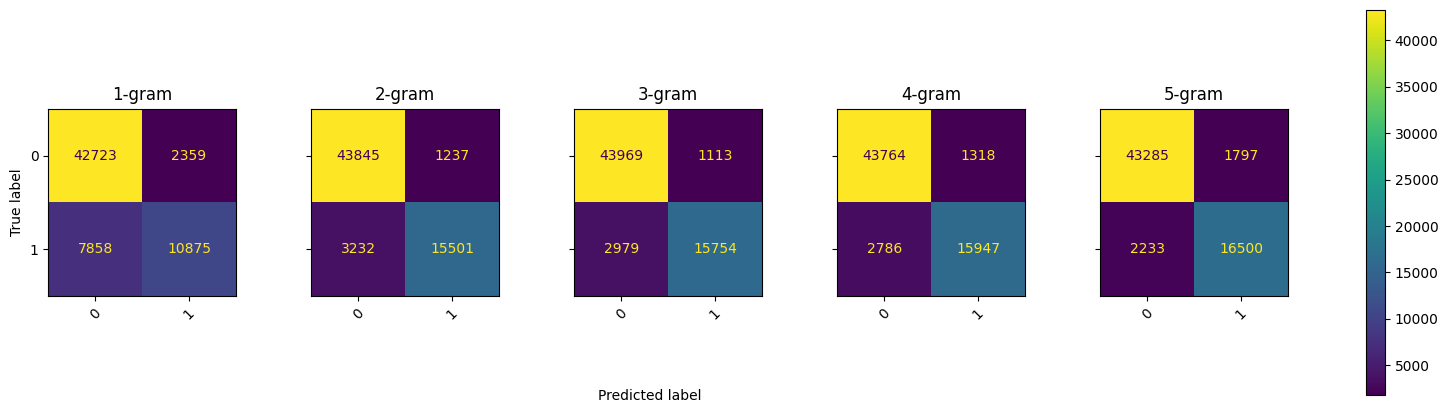

In [18]:
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    print("Model: " + key)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Features dimension: {len(X_train), len(classifier[0].vocabulary_)}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=classifier.classes_)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0: 
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()